In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
'''
The np.random.seed() function sets the random seed for NumPy's pseudo-random number generator.
It's necessary for reproducibility in situations where you want the same sequence of random numbers to be generated every time you run your code.
If the seed it not set , it is very likely that the results will differ every time
'''
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
data_dir = 'C:/Users/anta9/Documents/gtsrb-german-traffic-sign'
train_path = 'C:/Users/anta9/Documents/gtsrb-german-traffic-sign/Train'
test_path = 'C:/Users/anta9/Documents/gtsrb-german-traffic-sign/'

# Resizing the images to 30x30x3
# 3 channels resemble RGB
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

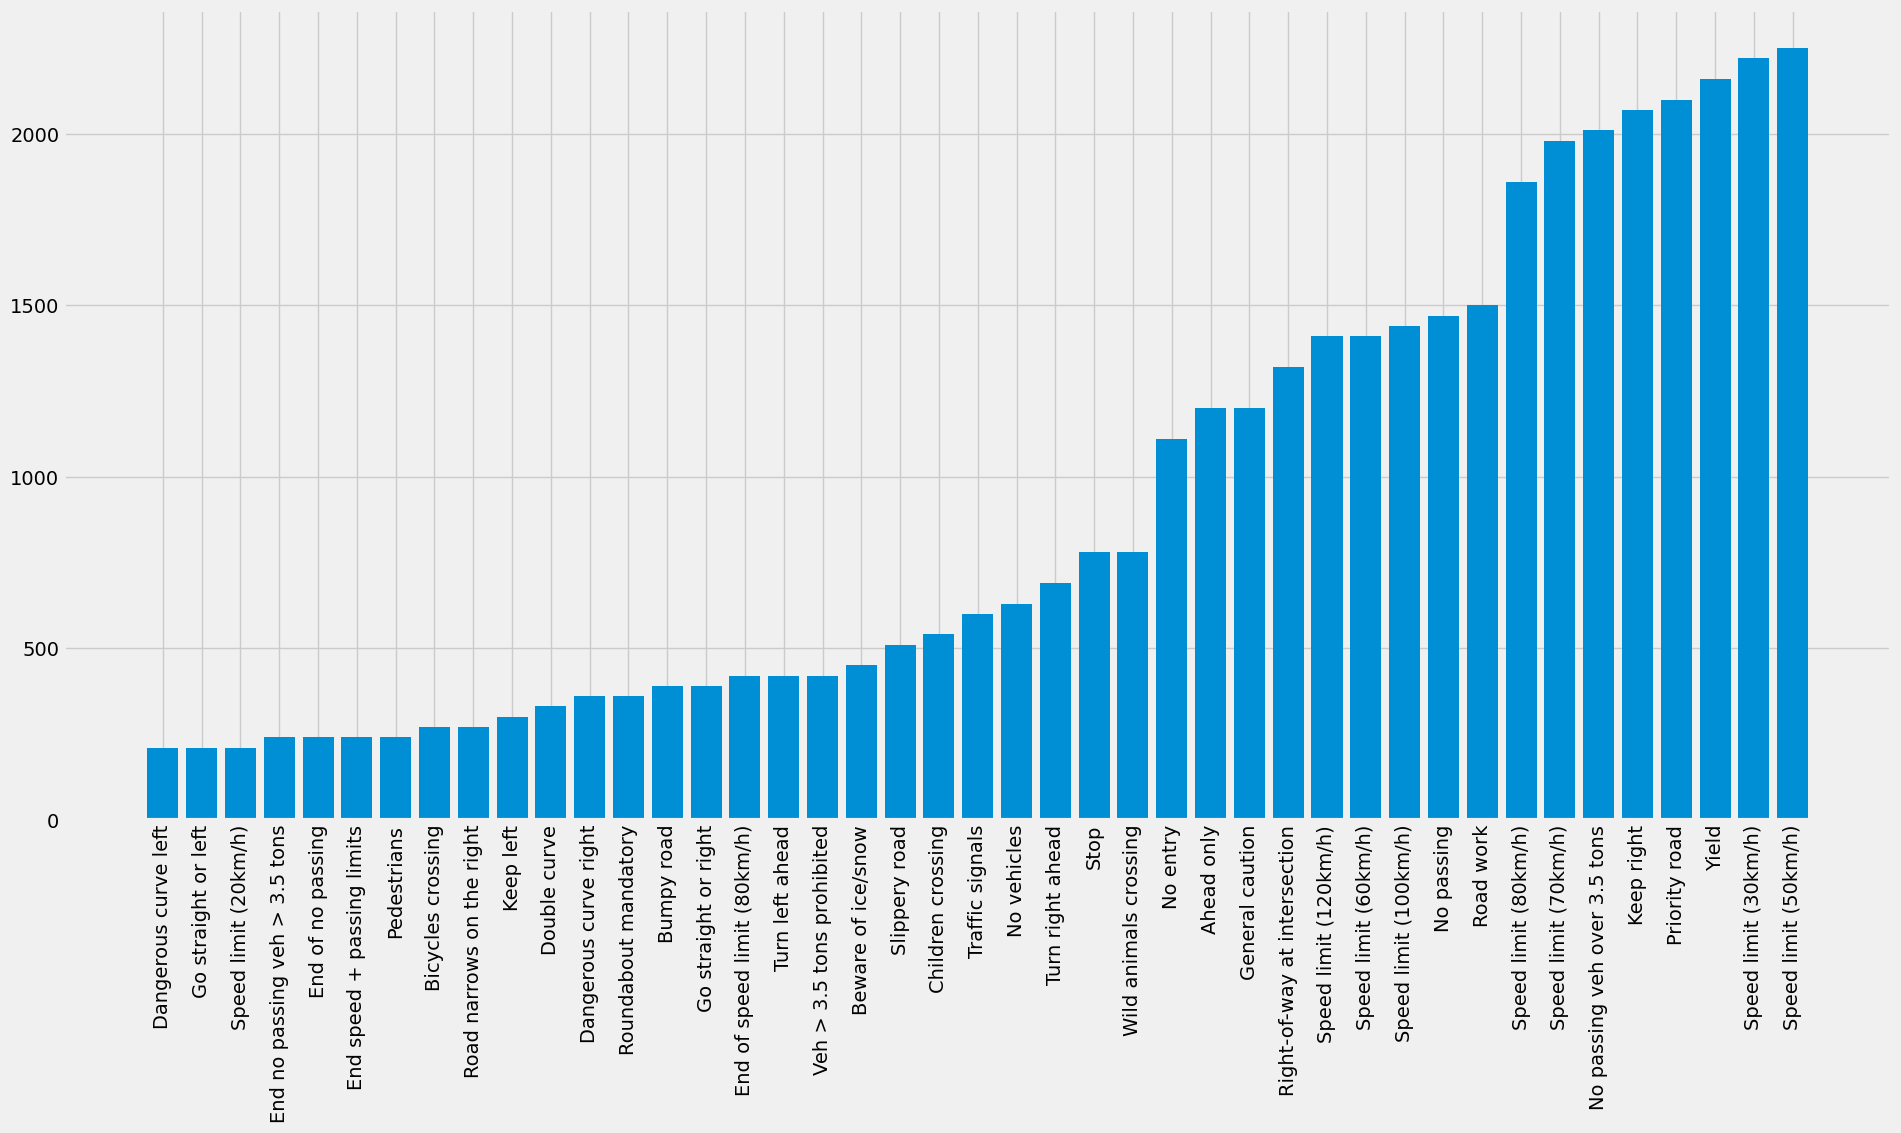

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    # lists all the files in the current folder being iterated over and assigns them to the train_files variable.
    train_files = os.listdir(train_path + '/' + folder)
    # calculates the number of files in the current folder (train_files) using the len() function, and appends this number to the train_number list.
    train_number.append(len(train_files))
    # converts the folder name (which represents the class label) to an integer (int(folder)) and uses it as an index to retrieve the corresponding class name from the classes dictionary.
    # The retrieved class name is then appended to the class_num list.
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
# This line "unzips" the sorted pairs back into separate lists, resulting in two lists: one containing the sorted numbers of training files and the other containing the corresponding class names.
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
# 21 inches x 10 inches ( width x height )
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

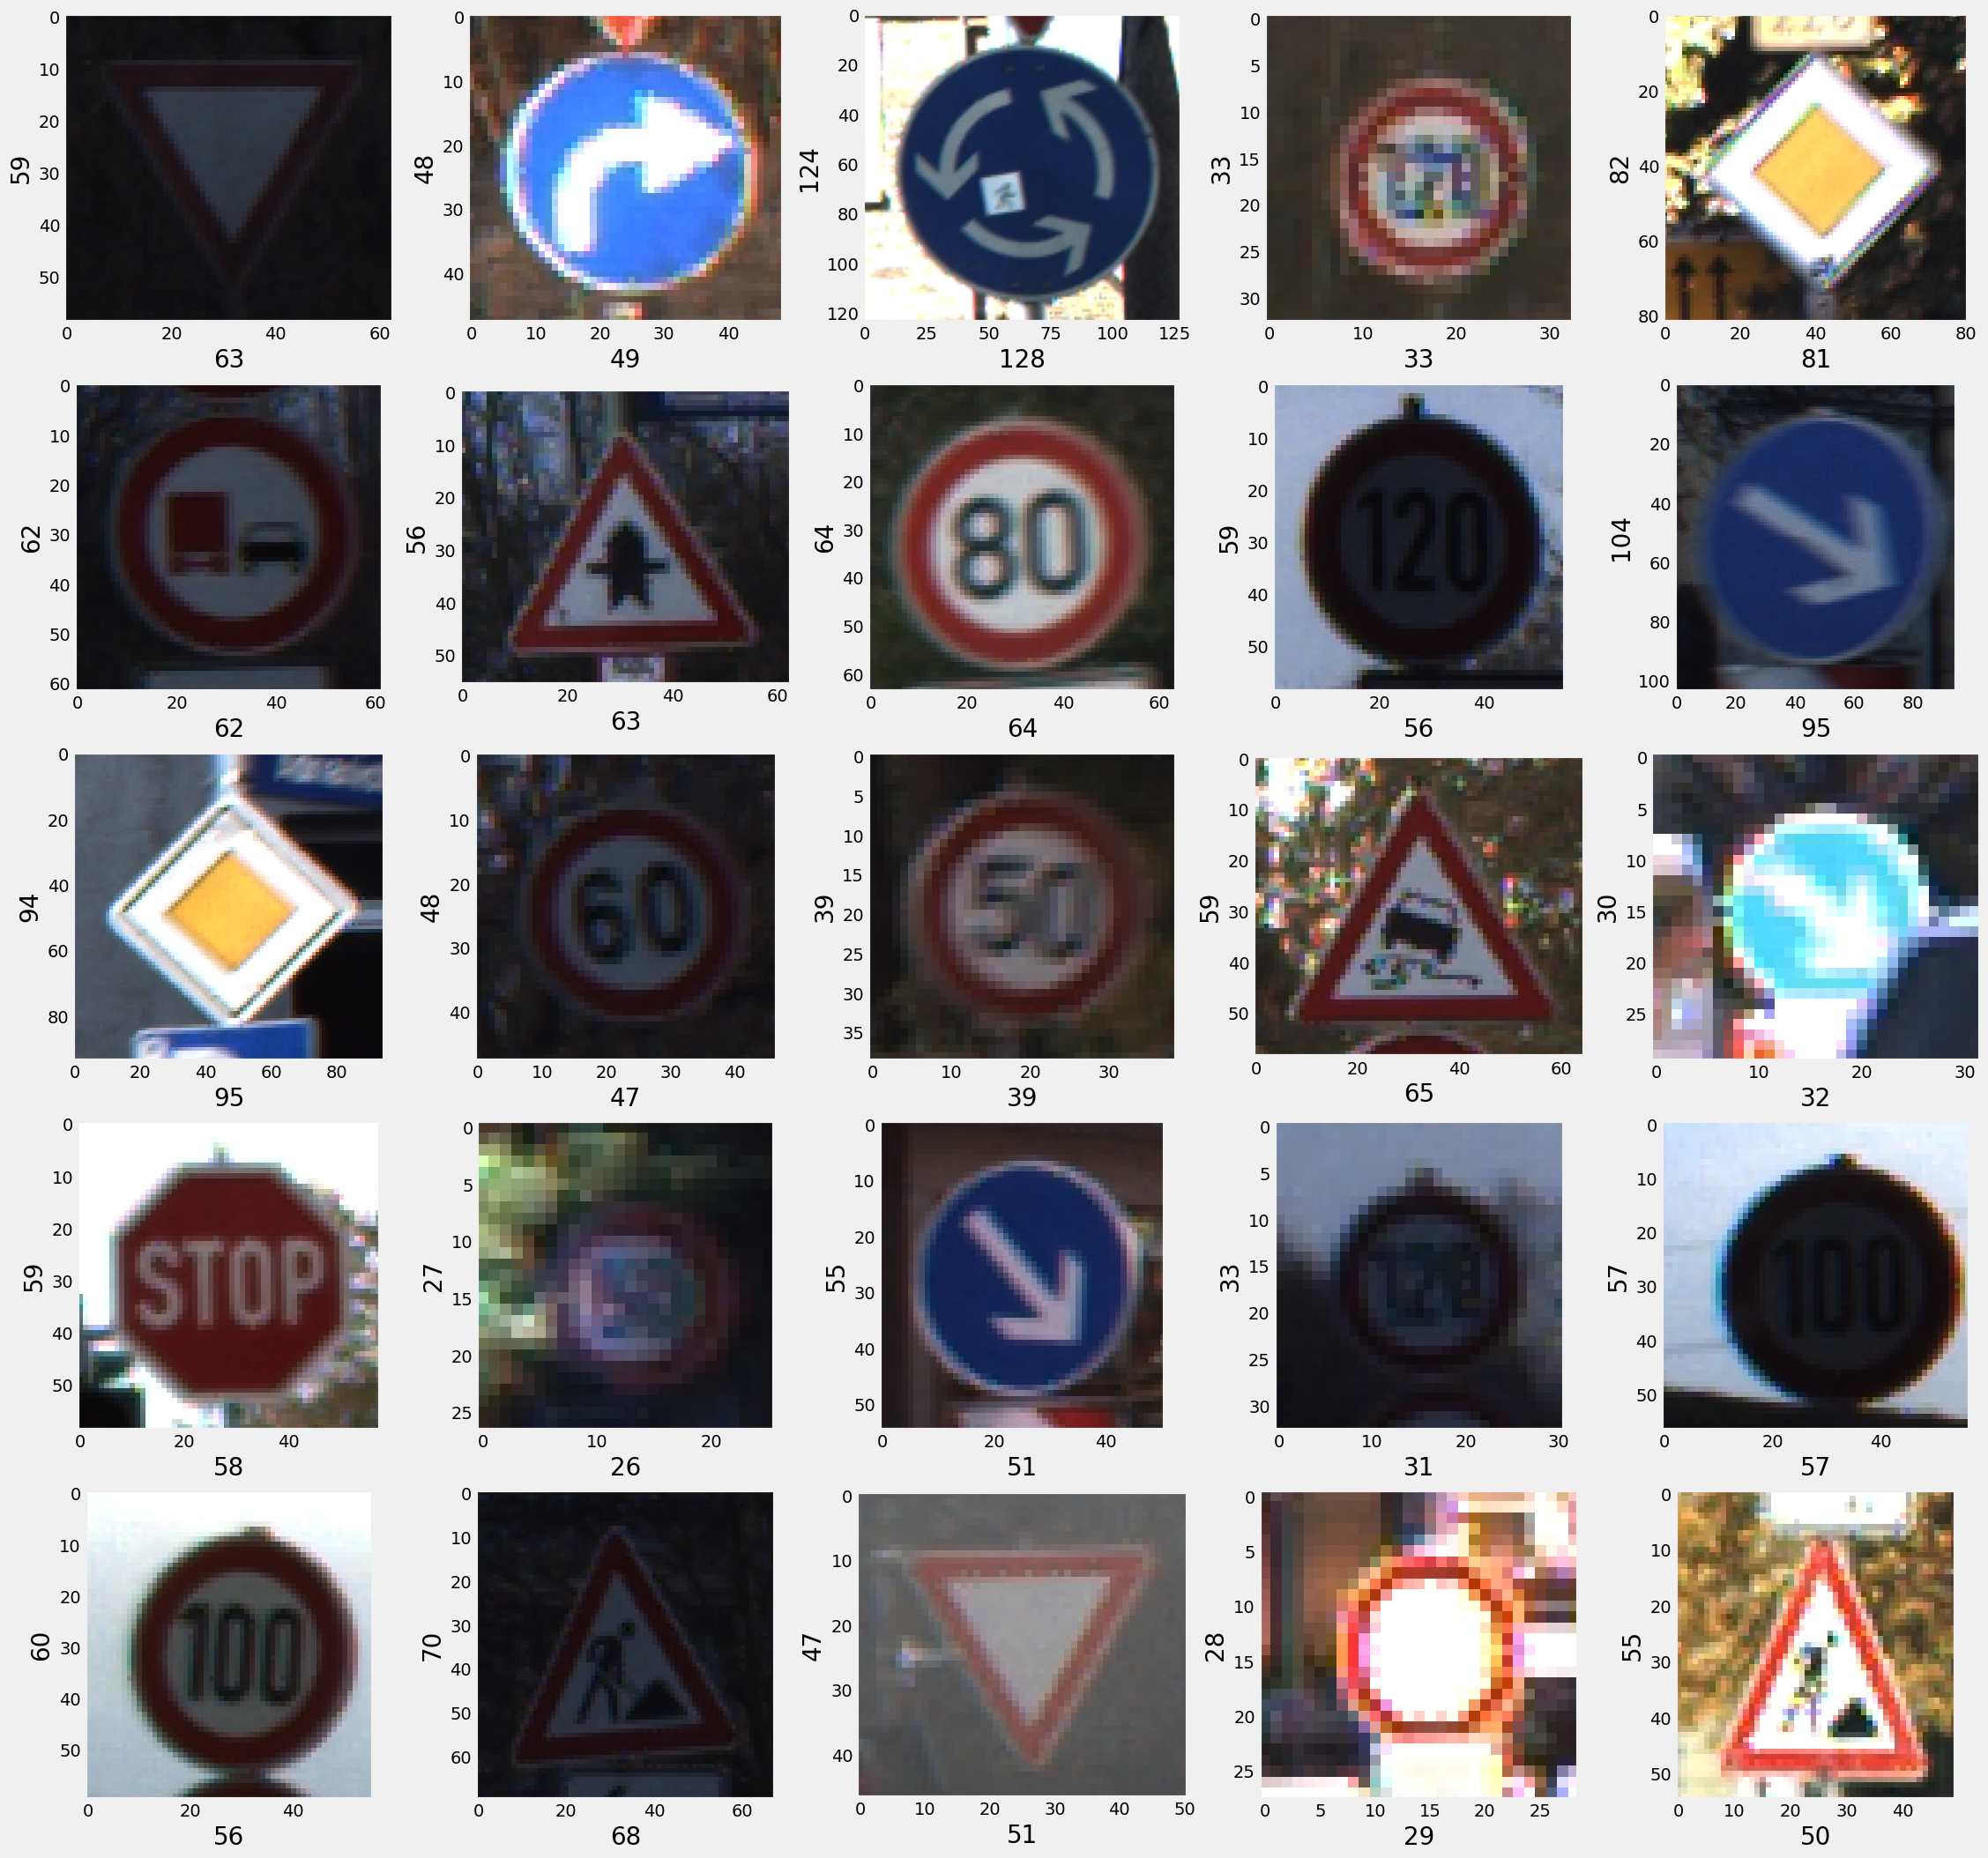

In [ ]:
# Visualizing 25 random images from test data
import random
# imread is used to read image file into array
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    # creates subplots within the figure. For each iteration of the loop, it selects a subplot position based on the current value of i.
    # In this case, it creates a grid of 5 rows and 5 columns of subplots, and i determines the position of each subplot within this grid.
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    # b=None will turn off grid lines
    plt.grid(None)
    # shape[1] corresponds to column
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    # shape[0] corresponds to rows
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [ ]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            # resize the images into 30x30 format
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
# line creates an array of indices ranging from 0 to the number of images in the dataset (image_data.shape[0]).
# These indices represent the positions of the images in the dataset before shuffling.
shuffle_indexes = np.arange(image_data.shape[0])

# line shuffles the array of indices randomly. The np.random.shuffle() function randomly permutes the elements of an array in place, effectively shuffling the order of the indices.
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
# 30% testing and 70% training
# additional shuffling ( shuffle = True ) ensures more randomness in data
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

# Normalizing the data
'''
Normalization is needed for better generalization of data , stable training and connvergence is more efficient
'''
X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [ ]:
aug = ImageDataGenerator(

    # By rotating the images randomly, you introduce variability into the training data, making the model more robust to variations in object orientation.
    # # rotate between -10 to +10 degrees
    rotation_range=10,

    # The zoom range parameter controls the extent to which random zooms are applied to the images.
    # Randomly zooming in or out of the images simulates the effect of capturing objects from different distances, helping the model generalize better to objects of varying sizes.
    # Will range between [1-zoom_range] , [1+zoom_range]
    zoom_range=0.15,

    # These parameters control the range of horizontal and vertical shifts that can be applied to the images.
    # Shifting the images horizontally or vertically mimics the effect of capturing objects from slightly different perspectives or positions, making the model more tolerant to changes in object location within the images.

    width_shift_range=0.1,
    height_shift_range=0.1,

    # Shearing involves tilting the image along its axis. The shear range parameter determines the intensity of the shearing effect applied to the images.
    # Shearing can help the model learn to recognize objects from different viewpoints, improving its ability to generalize to unseen data.
    shear_range=0.15,

    # enable random horizontal or vertical flipping of the images. Flipping images horizontally or vertically introduces additional variations, such as changes in object orientation or symmetry, which can enhance the model's robustness.
    horizontal_flip=False,
    vertical_flip=False,

    # "nearest" fill mode is a method used to determine how to fill in newly created pixels when applying transformations like rotation, shifting, or zooming to an image.
    fill_mode="nearest")

In [ ]:
pip install keras-tuner --upgrade

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   ------------ -------------------------- 41.0/129.1 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import kerastuner as kt

def model_builder(hp):
    # Sequential model - linear stack of layers
    model = keras.Sequential()

    # Tune the number of units in the first Conv2D layer
    hp_filters1 = hp.Int('filters1', min_value=16, max_value=128, step=16)
    # kernel_size=(3,3) --> This means that the convolution operation will be applied using a 3x3 filter over the input data.
    '''
    'relu' stands for Rectified Linear Unit, which is a commonly used activation function in deep learning.
    ReLU activation is chosen here because it introduces non-linearity into the model, helping it learn complex patterns in the data.
    Using other activation functions like sigmoid or tanh may lead to vanishing gradients or slower convergence in deep neural networks.
    ReLU is preferred because it addresses these issues and provides faster training.
    '''
    model.add(keras.layers.Conv2D(filters=hp_filters1, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)))



    # Tune the number of units in the second Conv2D layer
    hp_filters2 = hp.Int('filters2', min_value=32, max_value=256, step=32)
    model.add(keras.layers.Conv2D(filters=hp_filters2, kernel_size=(3, 3), activation='relu'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    '''
    The MaxPooling2D layer reduces the spatial dimensions (width and height) of the input volume.
    It achieves this by sliding a 2x2 pooling filter over the input and taking the maximum value within each 2x2 region.
    This helps in reducing the computational complexity of the model by downsampling the feature maps and extracting the most important features.
    '''
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    '''
    Batch normalization is a technique used to improve the training stability and accelerate the convergence of deep neural networks.
    It normalizes the activations of the previous layer, ensuring that they have zero mean and unit variance.
    The axis=-1 parameter indicates that normalization is applied along the last axis of the input tensor, which typically corresponds to the feature dimension.
    '''
    model.add(keras.layers.BatchNormalization(axis=-1))

    # These layers perform convolution operations on the input feature maps using learnable filters.
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

    # this layer further reduces the spatial dimensions of the feature maps.
    # By downsampling the feature maps, it retains the most important information while reducing computational complexity.
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # this layer normalizes the activations of the previous layer, improving the stability and convergence of the model.
    model.add(keras.layers.BatchNormalization(axis=-1))

    # The Flatten layer reshapes the 2D feature maps into a 1D vector, preparing them to be fed into the fully connected layers (Dense layers) of the neural network.
    # It converts the spatial information in the feature maps into a one-dimensional representation, which is required for the subsequent dense layers.
    model.add(keras.layers.Flatten())

    # Tune the number of units in the Dense layer
    # units --> number of neurons in the dense layer

    hp_units = hp.Int('units', min_value=256, max_value=1024, step=256)
    #  line adds a Dense (fully connected) layer to the model.
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    # normalizes the activations of the previous layer, improving the stability and convergence of the model during training.
    model.add(keras.layers.BatchNormalization())
    # Dropout is a regularization technique that randomly sets a fraction (specified by the rate parameter) of input units to zero during training.
    # It helps prevent overfitting by reducing the reliance of the model on specific neurons and encourages robustness.
    model.add(keras.layers.Dropout(rate=0.5))


    # This line adds the output Dense layer to the model.
    # The activation parameter is set to 'softmax', which applies the softmax activation function to produce probability scores for each class.
    model.add(keras.layers.Dense(43, activation='softmax'))


    # 'categorical_crossentropy'is commonly used for multi-class classification problems.
    '''
    Why Adam optimizer is used ?

    1. Adaptive Learning Rates: Adam adapts the learning rates for each parameter individually, based on the past gradients and updates. This adaptiveness helps converge faster and more reliably compared to optimizers with fixed learning rates.

    2. Efficiency: Adam maintains per-parameter learning rates and exponentially decaying average of past gradients, which makes it computationally efficient. It typically requires less tuning of hyperparameters compared to other optimizers.

    3. Robustness: Adam performs well on a wide range of deep learning tasks and architectures. It is less sensitive to the choice of hyperparameters and often converges smoothly.
    '''
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# kt.Hyperband is a hyperparameter tuner that implements the Hyperband algorithm, which is an adaptive resource allocation algorithm for hyperparameter optimization.
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,

                     # This parameter specifies the reduction factor for the number of epochs and resources allocated in each successive round of the Hyperband algorithm.
                     # In each successive round, the number of configurations evaluated is reduced by a factor of factor, while the resources allocated to each configuration are increased accordingly.
                     factor=3,
                     directory='my_dir',
                     project_name='traffic_sign_recognition')

# This parameter specifies the number of epochs with no improvement after which training will be stopped. Here, training will stop if there is no improvement in validation loss for 5 consecutive epochs.
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(aug.flow(X_train, y_train, batch_size=32),
             epochs=30,
             validation_data=(X_val, y_val),
             callbacks=[stop_early])

# Get the optimal hyperparameters
# When you set num_trials = 1, it means you are asking the tuner to return only the single best set of hyperparameters found during the search process.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of filters in the first Conv2D layer is {best_hps.get('filters1')}")
print(f"The optimal number of filters in the second Conv2D layer is {best_hps.get('filters2')}")
print(f"The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}")
print(f"The optimal number of units in the Dense layer is {best_hps.get('units')}")


Trial 30 Complete [00h 11m 08s]
val_accuracy: 0.9852078557014465

Best val_accuracy So Far: 0.9981297254562378
Total elapsed time: 03h 10m 42s
The optimal number of filters in the first Conv2D layer is 128
The optimal number of filters in the second Conv2D layer is 224
The optimal learning rate for the optimizer is 0.001
The optimal number of units in the Dense layer is 256


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(aug.flow(X_train, y_train, batch_size=32),
                    epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 146s 166ms/step - accuracy: 0.3908 - loss: 2.4919 - val_accuracy: 0.9693 - val_loss: 0.1020
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 146s 170ms/step - accuracy: 0.9292 - loss: 0.2416 - val_accuracy: 0.9878 - val_loss: 0.0405
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 145s 169ms/step - accuracy: 0.9642 - loss: 0.1217 - val_accuracy: 0.9923 - val_loss: 0.0260
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 145s 169ms/step - accuracy: 0.9777 - loss: 0.0787 - val_accuracy: 0.9945 - val_loss: 0.0187
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 145s 168ms/step - accuracy: 0.9794 - loss: 0.0737 - val_accuracy: 0.9963 - val_loss: 0.0118
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 145s 169ms/step - accuracy: 0.9842 - loss: 0.0541 - val_accuracy: 0.9920 - val_loss: 0.0280
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 146s 170ms/step - accuracy: 0.9848 - loss: 0.0513 - val_accuracy: 0.9866 - val_loss: 0.0455
Epoch 8/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 144s 168ms/step - accuracy: 0.9834 -

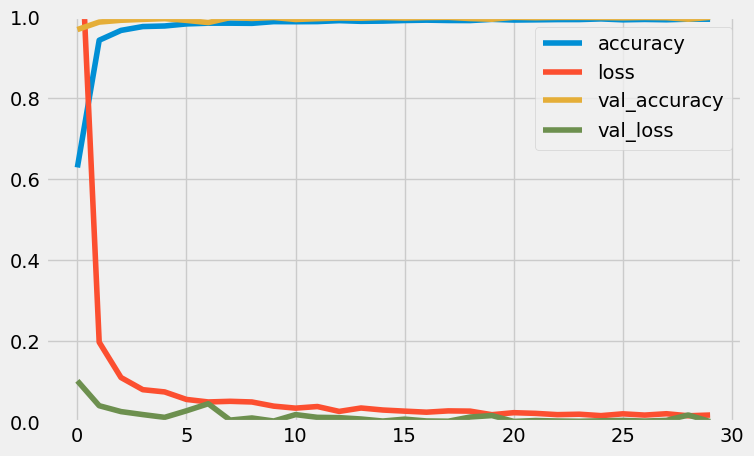

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

368/368 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step


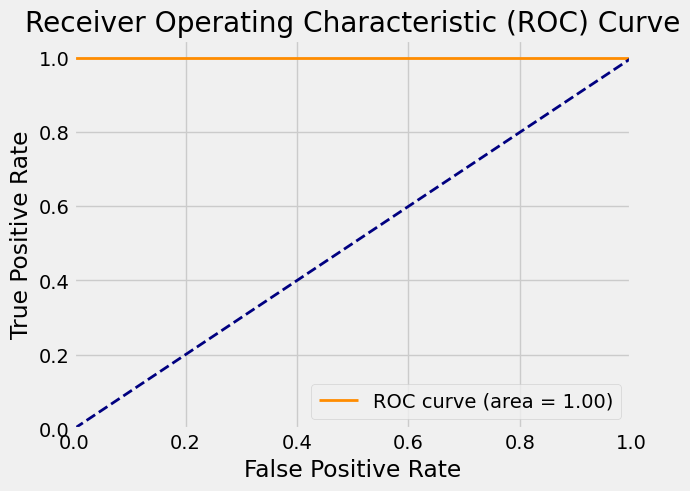

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the validation set
y_probs = model.predict(X_val)

# Compute ROC curve and ROC area for each class
# Assuming the positive class is indexed as 1
fpr, tpr, _ = roc_curve(y_val[:, 1], y_probs[:, 1])
roc_auc = roc_auc_score(y_val[:, 1], y_probs[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score

test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except Exception as e:
        print("Error in", img, ":", str(e))

X_test = np.array(data)
X_test = X_test / 255

# Make predictions on the test set
y_probs = model.predict(X_test)

# Get the class with the highest probability for each prediction
pred = np.argmax(y_probs, axis=1)

# Accuracy with the test data
print('Test Data accuracy:', accuracy_score(labels, pred) * 100)


395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step
Test Data accuracy: 98.85985748218528


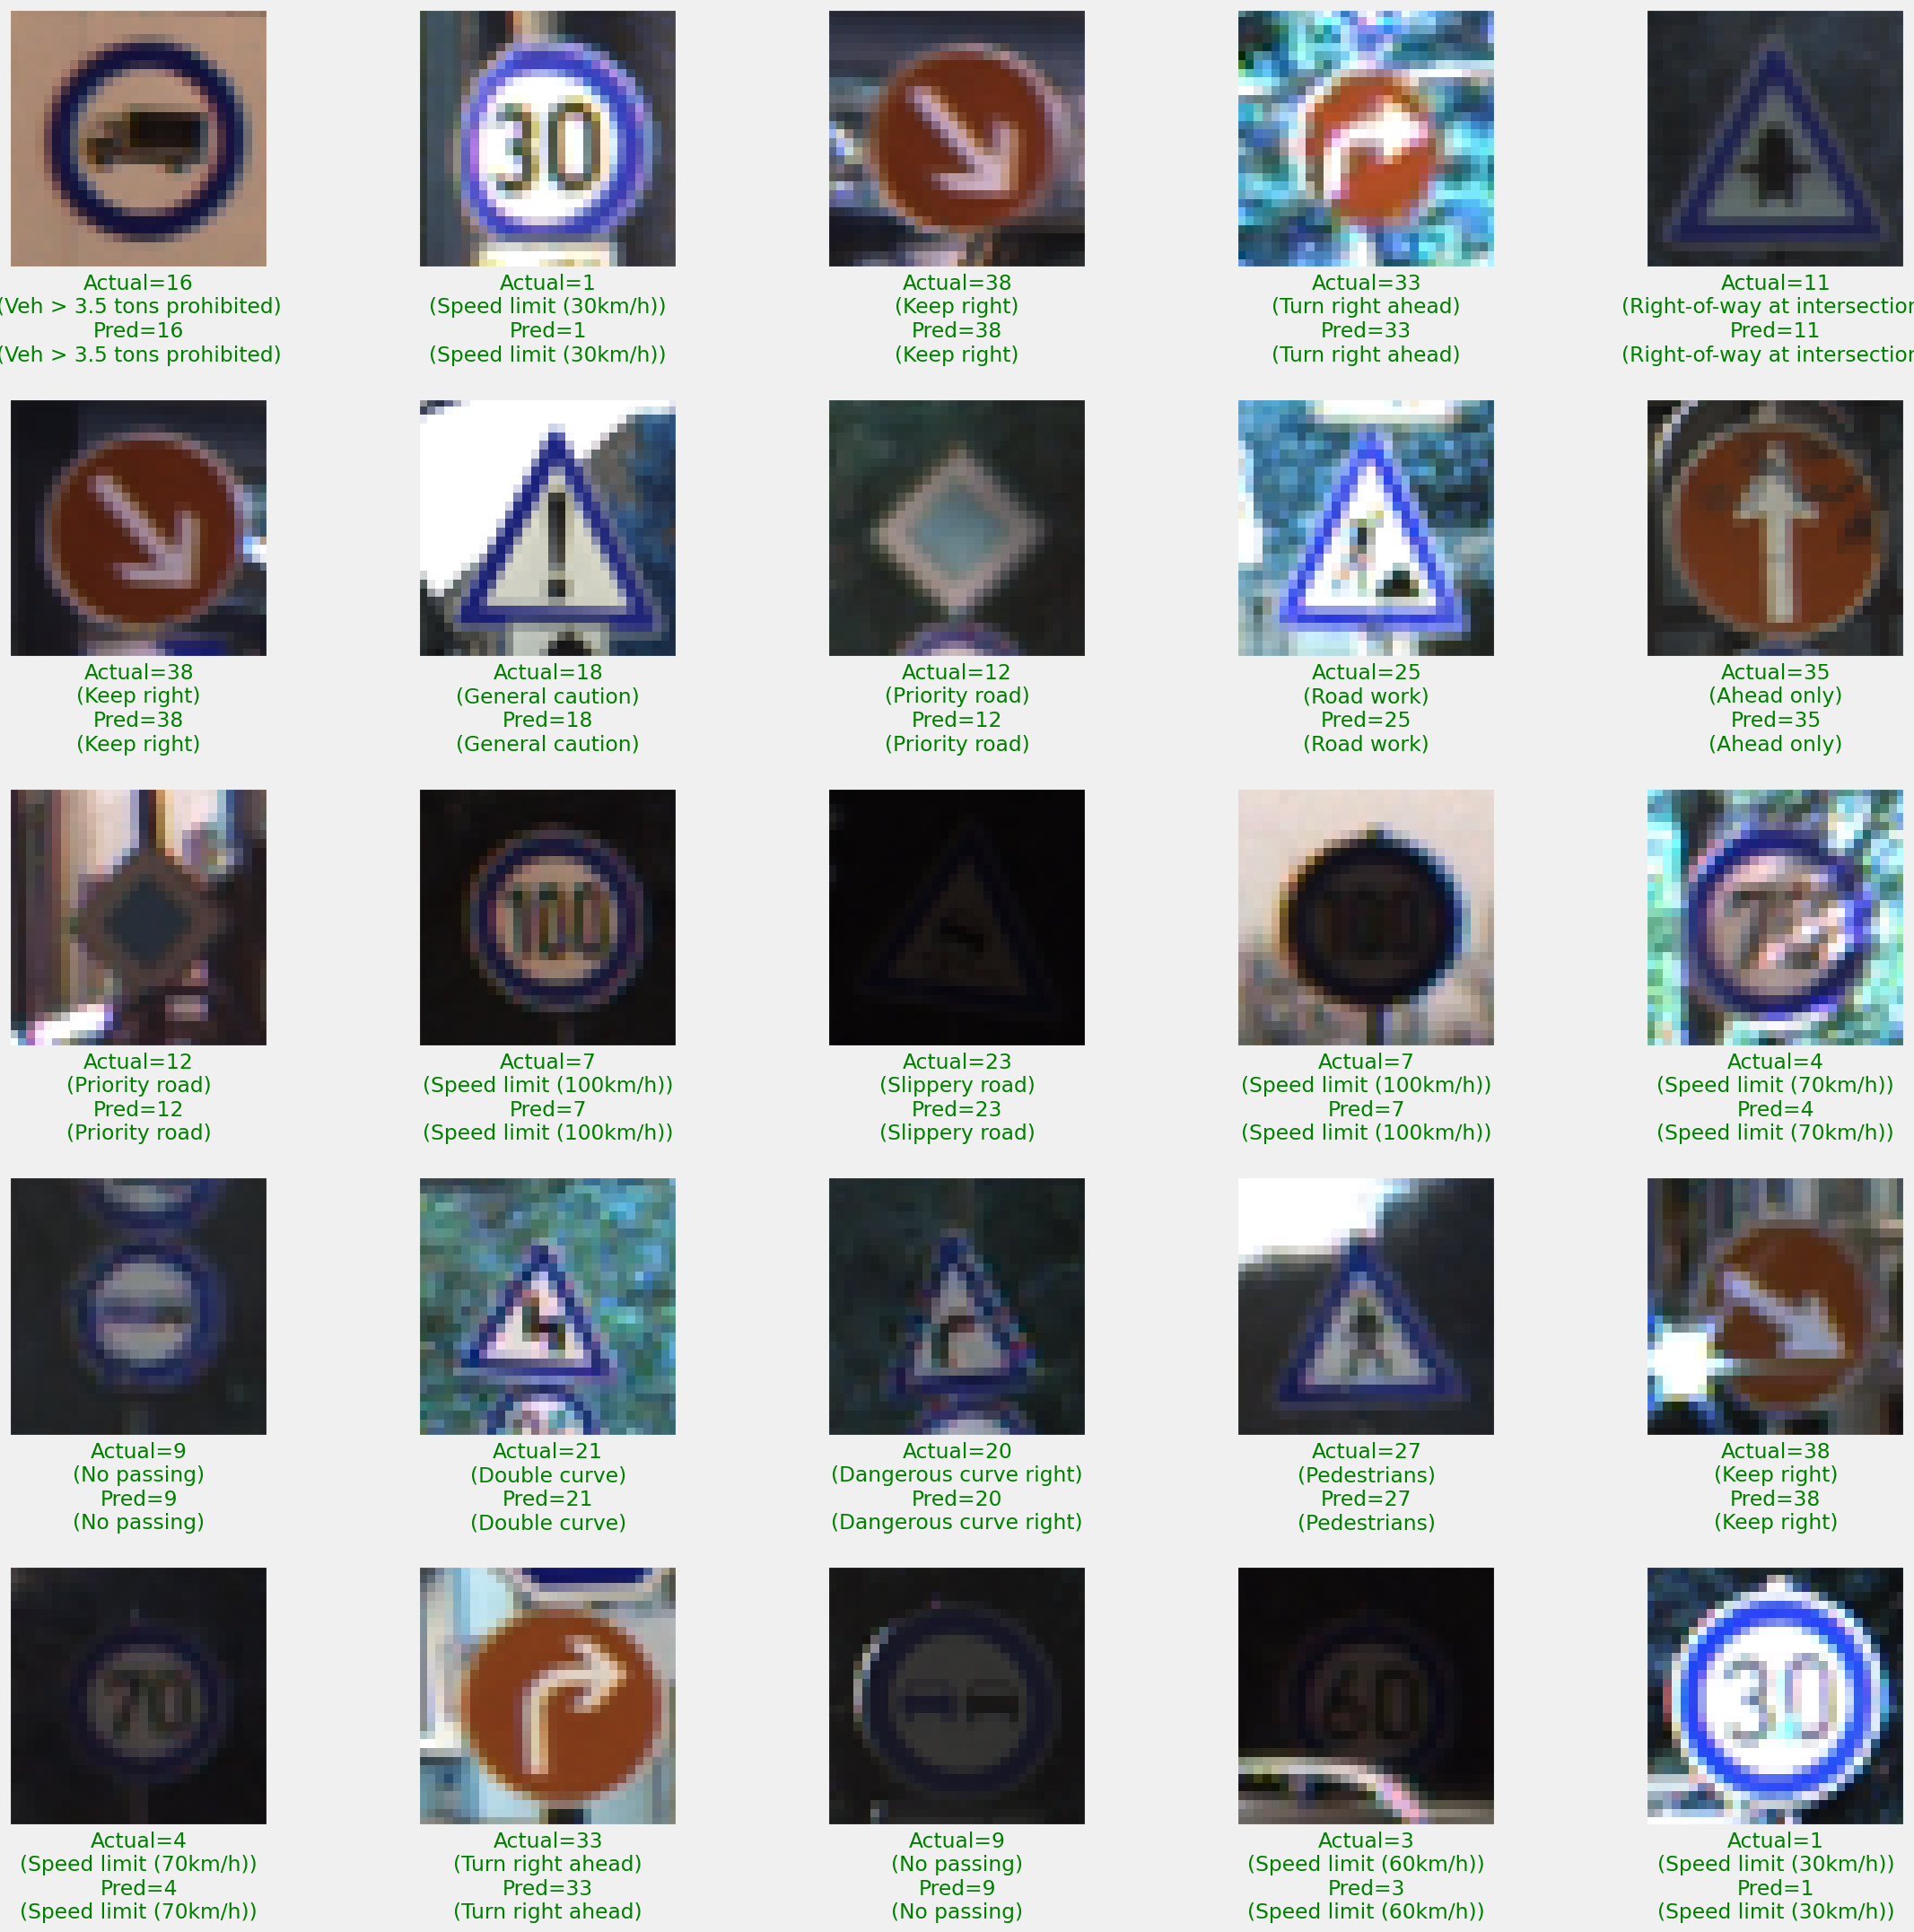

In [ ]:
plt.figure(figsize=(25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    actual_label = classes[actual]
    pred_label = classes[prediction]
    plt.xlabel('Actual={}\n({})\nPred={}\n({})'.format(actual, actual_label, prediction, pred_label), color=col)
    plt.imshow(X_test[start_index + i])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model_path = ('C:/Users/anta9/Documents/model.h5')
model.save(model_path)

In [ ]:
import tensorflow as tf

# Assuming you have already trained your model and it's stored in the variable 'model'
# and you have defined 'saved_model_path' as the path where you want to save your model
model_path = ('C:/Users/anta9/Documents')
tf.saved_model.save(model,model_path)


INFO:tensorflow:Assets written to: C:/Users/anta9/Documents\assets


INFO:tensorflow:Assets written to: C:/Users/anta9/Documents\assets


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


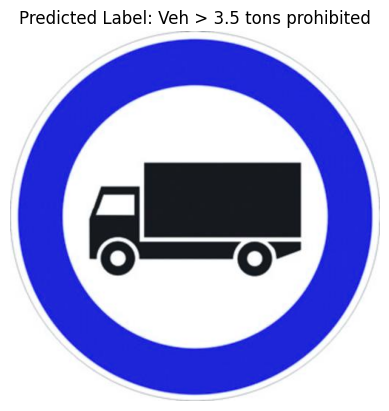

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model



# Load your pre-trained model
model_path = 'C:/Users/anta9/Documents/model.h5'
model = load_model(model_path)

# Function to preprocess the input image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to RGB format
    image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    # Normalize the pixel values
    image = image / 255.0
    # Expand the dimensions to match the input shape expected by the model
    image = np.expand_dims(image, axis=0)
    return image

# Function to make predictions on the input image
def predict_image(image_path):
    # Preprocess the input image
    image = preprocess_image(image_path)
    # Make predictions using the model
    predictions = model.predict(image)
    # Get the predicted class
    predicted_class = np.argmax(predictions)
    # Get the predicted class label
    predicted_label = classes[predicted_class]
    # Display the image and the predicted label
    plt.imshow(cv2.imread(image_path))
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'C:/Users/anta9/Documents/download1.jpg'
predict_image(image_path)